In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

### 사용할 데이터 준비

In [3]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [4]:
df1 = pd.read_csv('data/breast_cancer.csv')

X = df1.drop('target', axis=1)
y = df1['target']

In [7]:
encoder1 = LabelEncoder()
encoder1.fit(y)
y = encoder1.transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

### 표준화 없이 학습

In [8]:
model1 = LogisticRegression(random_state=1)

In [10]:
r1 = cross_val_score(model1, X, y, scoring='f1', cv=kfold)
r1.mean()

0.9295215905596074

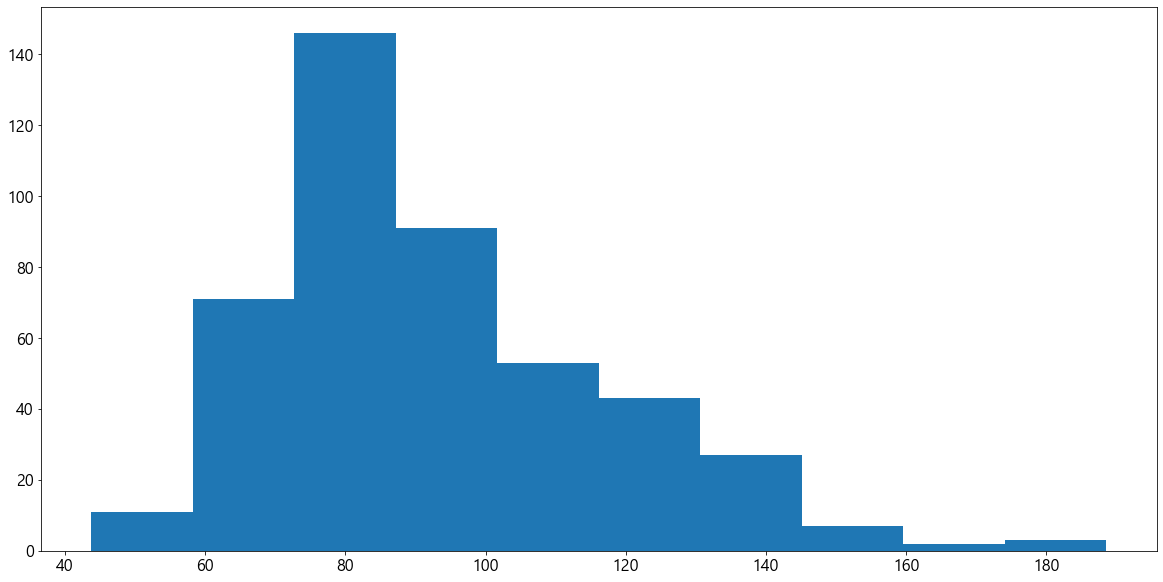

In [13]:
plt.hist(X['mean perimeter'])
plt.show()

### Standard Scaler
- 기존 변수의 범위를 정규 분포로 변환하는 것.
- 데이터의 최소 최대를 모를 때 사용
- 모든 피처의 평균을 0, 분산을 1로 만든다.
- 이상치가 있다면 평균과 표준편차에 영향을 미치기 때문에 문제가 발생할 수 있다.
- 이상치가 많다면 사용하지 않는 것을 권장한다.

In [15]:
scaler1 = StandardScaler()
scaler1.fit(X)
X2 = scaler1.transform(X)
X2

array([[ 1.0716471 , -2.11021126,  1.24691885, ...,  2.21627442,
         2.57629265,  1.89296305],
       [ 1.80872514, -0.29975355,  1.665741  , ...,  1.02843583,
        -0.29491256,  0.27048275],
       [ 1.55731868,  0.55280299,  1.54548514, ...,  1.88116631,
         1.04374227,  0.19229093],
       ...,
       [ 1.52874976,  1.47150615,  1.4501098 , ...,  0.43900458,
        -1.00379467, -1.25588676],
       [-0.63963097,  2.26281581, -0.66183197, ..., -0.68959168,
        -0.76491536, -0.11396037],
       [ 0.0831626 , -1.22825622,  0.04684827, ..., -0.15491471,
        -0.51828023, -0.32247189]])

In [16]:
model1 = LogisticRegression(random_state=1)

r1 = cross_val_score(model1, X2, y, cv=kfold)
r1.mean()

0.9692753623188406

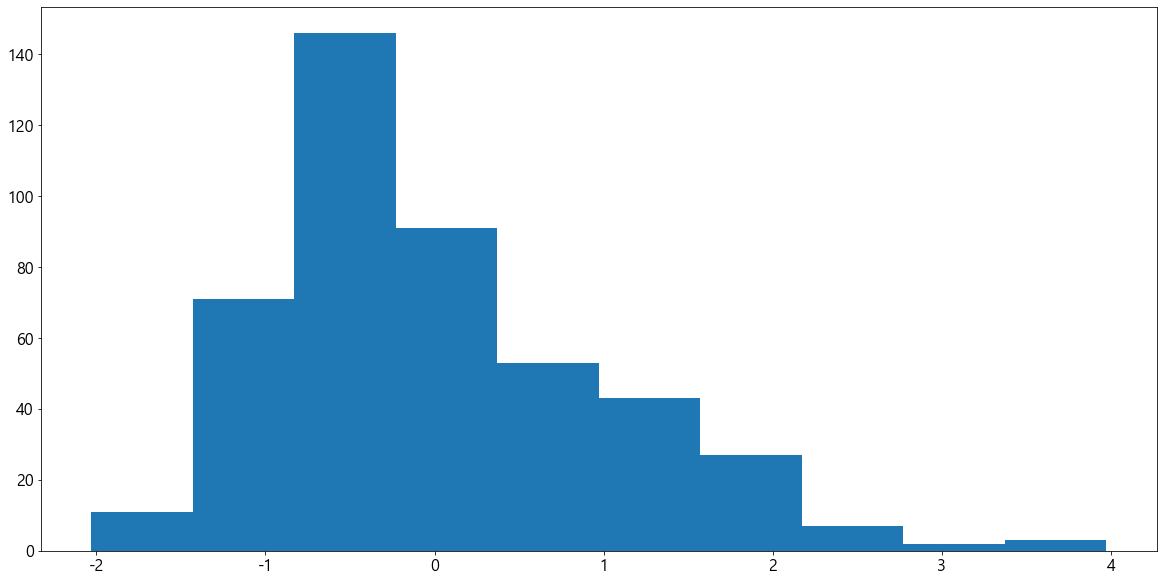

In [22]:
plt.hist(X2[:, 2])
plt.show()

### Normalizer
- 각 변수의 값을 원점으로 부터 1만큼 떨어져 있는 범위 내로 변환한다.
- 빠르게 변환할 수 있는 장점이 있고 과적합 확률을 낮출 수 있다.

In [23]:
scaler2 = Normalizer()
scaler2.fit(X)
X3 = scaler2.transform(X)
X3

array([[7.92541486e-03, 4.57286305e-03, 5.40989964e-02, ...,
        1.16920795e-04, 2.02695018e-04, 5.23808686e-05],
       [8.66575595e-03, 7.48616836e-03, 5.59882822e-02, ...,
        7.83583182e-05, 1.15852352e-04, 3.75024596e-05],
       [9.36668268e-03, 1.01087865e-02, 6.18419883e-02, ...,
        1.15596947e-04, 1.71873157e-04, 4.16624718e-05],
       ...,
       [1.05025986e-02, 1.34030100e-02, 6.84625750e-02, ...,
        7.85952505e-05, 1.22932408e-04, 3.26550935e-05],
       [1.72142654e-02, 4.04965594e-02, 1.10128263e-01, ...,
        1.02080594e-04, 3.51027562e-04, 1.17544742e-04],
       [1.45416985e-02, 1.39912557e-02, 9.39355692e-02, ...,
        1.06986068e-04, 2.60809816e-04, 7.81628804e-05]])

In [24]:
model1 = LogisticRegression(random_state=1)

r1 = cross_val_score(model1, X3, y, cv=kfold)
r1.mean()

0.788550724637681

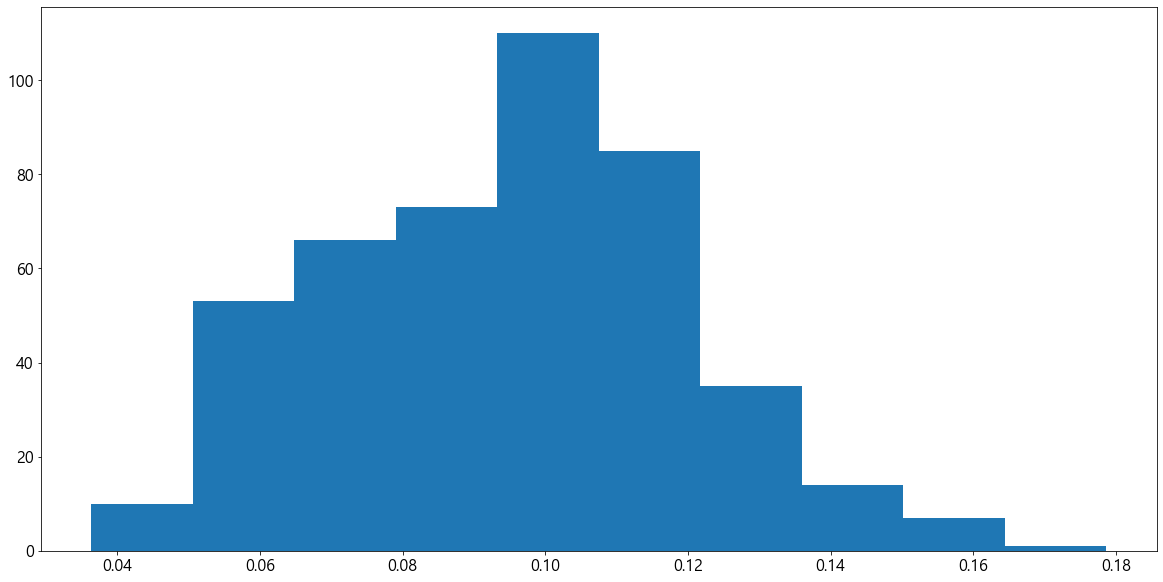

In [25]:
plt.hist(X3[:, 2])
plt.show()

### MinMaxScaler
- 데이터들의 값을 0 ~ 1 사이의 값으로 변환시키는 것.
- 각 변수의 값의 표준 편차가 매우 작을 때 효과적.
- 이상치에 매우 민감하다.

In [26]:
scaler3 = MinMaxScaler()
scaler3.fit(X)
X4 = scaler3.transform(X)
X4

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.59676274, 0.51707812, 0.57984935, ..., 0.50378007, 0.14350483,
        0.0385019 ],
       [0.23754082, 0.62631045, 0.22790408, ..., 0.24453608, 0.17386162,
        0.17643972],
       [0.35728146, 0.14440311, 0.34600235, ..., 0.36735395, 0.20520402,
        0.15125279]])

In [27]:
model1 = LogisticRegression(random_state=1)

r1 = cross_val_score(model1, X4, y, scoring='f1', cv=kfold)
r1.mean()

0.9556411887179648

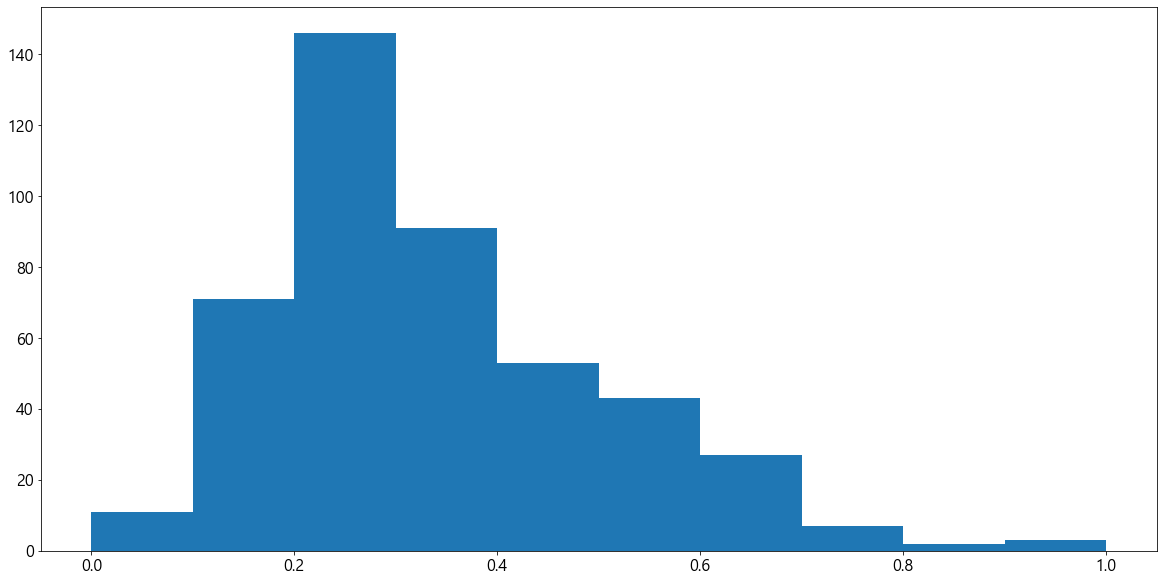

In [28]:
plt.hist(X4[:, 2])
plt.show()

### Robust Scaler
- Standard Scaler와 유사한다.
- 중위수(median, 중간값)과 사분위 수(0%, 25%, 50%, 75%, 100%, 위치값)을 이용한다.
- Standard Scaler가 이상치가 많은 데이터의 경우 문제가 발생할 수 있다는 것을 보완하기 위해 만든 Scaler

In [29]:
scaler4 = RobustScaler()
scaler4.fit(X)
X5 = scaler4.transform(X)
X5

array([[ 1.03669725, -1.49954833,  1.14998792, ...,  1.51567823,
         2.60281065,  1.8567157 ],
       [ 1.62844037, -0.16440831,  1.47524354, ...,  0.77962409,
        -0.13535503,  0.42722162],
       [ 1.4266055 ,  0.46431798,  1.38185331, ...,  1.30802568,
         1.14127219,  0.35833034],
       ...,
       [ 1.40366972,  1.14182475,  1.3077852 , ...,  0.41437809,
        -0.81139053, -0.91759359],
       [-0.33715596,  1.72538392, -0.33234039, ..., -0.28496605,
        -0.58357988,  0.08850616],
       [ 0.24311927, -0.84914182,  0.21801787, ...,  0.04635102,
        -0.34837278, -0.09520392]])

In [30]:
model1 = LogisticRegression(random_state=1)

r1 = cross_val_score(model1, X5, y, scoring='f1', cv=kfold)
r1.mean()

0.9650155888813179

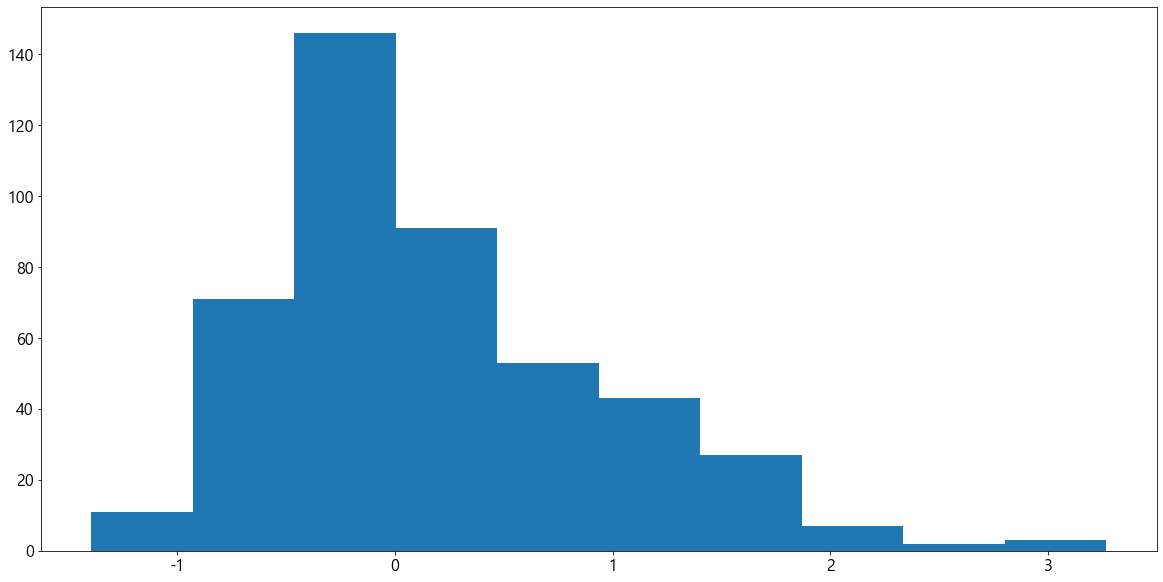

In [31]:
plt.hist(X5[:, 2])
plt.show()